In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import tree , metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [6]:
os.chdir("E:\\Data science online\\Kaggle\\archive")

In [7]:
df=pd.read_csv("aug_train.csv")

In [8]:
df.shape

(19158, 14)

In [9]:
test=pd.read_csv("aug_test.csv")

In [10]:
test.shape

(2129, 13)

In [11]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [14]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5 

In [15]:
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122


In [16]:
df['gender'] = df['gender'].apply(gender_to_numeric)
df['relevent_experience'] = df['relevent_experience'].apply(rel_experience)
df['enrolled_university'] = df['enrolled_university'].apply(enrollment)
df['education_level'] = df['education_level'].apply(edu_level)
df['major_discipline'] = df['major_discipline'].apply(major)
df['experience'] = df['experience'].apply(experience)
df['company_type'] = df['company_type'].apply(company_t)
df['company_size'] = df['company_size'].apply(company_s)
df['last_new_job'] = df['last_new_job'].apply(last_job)
df['city'] = df['city'].apply(city)

In [17]:
test['gender'] = test['gender'].apply(gender_to_numeric)
test['relevent_experience'] = test['relevent_experience'].apply(rel_experience)
test['enrolled_university'] = test['enrolled_university'].apply(enrollment)
test['education_level'] = test['education_level'].apply(edu_level)
test['major_discipline'] = test['major_discipline'].apply(major)
test['experience'] = test['experience'].apply(experience)
test['company_type'] = test['company_type'].apply(company_t)
test['company_size'] = test['company_size'].apply(company_s)
test['last_new_job'] = test['last_new_job'].apply(last_job)
test['city'] = test['city'].apply(city)

In [206]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,5,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,6,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,7,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,0,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [19]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [20]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [21]:
df1=df.dropna().reset_index(drop=True)

In [22]:
test=test.dropna().reset_index(drop=True)

In [25]:
df1.shape, test.shape

((8955, 14), (1019, 13))

In [28]:
df1['target'].value_counts()

0.0    7472
1.0    1483
Name: target, dtype: int64

In [29]:
df.corr()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,1.000000,-0.019946,-0.040455,0.005157,-0.043359,0.036053,-0.022341,0.026763,-0.035509,0.007650,0.008637,-0.030693,0.000998,0.049475
city,-0.019946,1.000000,-0.186088,-0.042351,-0.038315,0.078297,0.060693,-0.030375,-0.057182,-0.055790,-0.001269,-0.055140,-0.003640,-0.055564
city_development_index,-0.040455,-0.186088,1.000000,0.001854,0.059808,-0.132055,0.067905,0.083841,0.333967,0.040640,0.043334,0.188984,0.001920,-0.341665
gender,0.005157,-0.042351,0.001854,1.000000,-0.008954,-0.019957,-0.024215,0.058221,-0.053272,0.010767,0.062933,-0.014112,0.002555,0.018034
relevent_experience,-0.043359,-0.038315,0.059808,-0.008954,1.000000,-0.278637,-0.231448,-0.062920,0.340185,-0.001532,-0.171840,0.246657,0.011566,-0.128430
enrolled_university,0.036053,0.078297,-0.132055,-0.019957,-0.278637,1.000000,0.023179,-0.056798,-0.289641,-0.031621,0.101521,-0.182917,0.003505,0.106561
education_level,-0.022341,0.060693,0.067905,-0.024215,-0.231448,0.023179,1.000000,-0.008545,-0.040598,-0.012054,0.088032,-0.094425,-0.002487,-0.091101
major_discipline,0.026763,-0.030375,0.083841,0.058221,-0.062920,-0.056798,-0.008545,1.000000,-0.008107,-0.023635,0.041414,0.018791,-0.001383,-0.014854
experience,-0.035509,-0.057182,0.333967,-0.053272,0.340185,-0.289641,-0.040598,-0.008107,1.000000,0.043701,-0.039497,0.479033,0.000908,-0.176724
company_size,0.007650,-0.055790,0.040640,0.010767,-0.001532,-0.031621,-0.012054,-0.023635,0.043701,1.000000,-0.042132,0.044337,0.004497,-0.008695


In [308]:
df1['company_size'].value_counts()

5.0    1986
2.0    1814
4.0    1449
1.0     951
3.0     930
0.0     840
6.0     592
7.0     393
Name: company_size, dtype: int64

In [32]:
df1.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                    float64
relevent_experience         int64
enrolled_university       float64
education_level           float64
major_discipline          float64
experience                float64
company_size              float64
company_type              float64
last_new_job              float64
training_hours              int64
target                    float64
dtype: object

In [33]:
test.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                    float64
relevent_experience         int64
enrolled_university       float64
education_level           float64
major_discipline          float64
experience                float64
company_size              float64
company_type              float64
last_new_job              float64
training_hours              int64
dtype: object

In [34]:
df1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,1,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0
1,666,4,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0
2,402,7,0.762,1.0,1,0.0,0.0,0.0,13.0,0.0,0.0,5.0,18,1.0
3,27107,0,0.920,1.0,1,0.0,0.0,0.0,7.0,5.0,0.0,1.0,46,1.0
4,23853,0,0.920,1.0,1,0.0,0.0,0.0,5.0,7.0,0.0,1.0,108,0.0


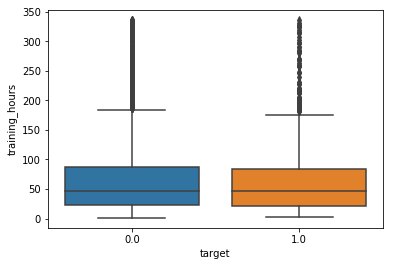

In [36]:
sns.boxplot(y=df1['training_hours'], x=df1['target'])

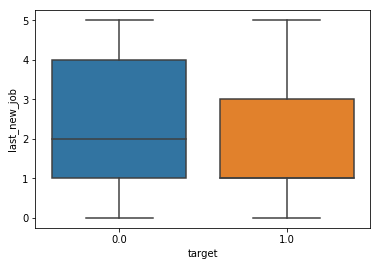

In [37]:
sns.boxplot(y=df1['last_new_job'], x=df1['target'])

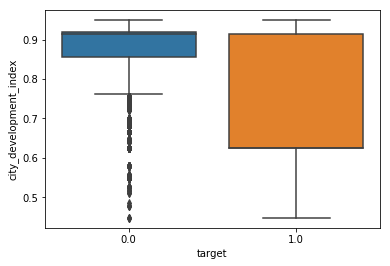

In [38]:
sns.boxplot(y=df1['city_development_index'], x=df1['target'])

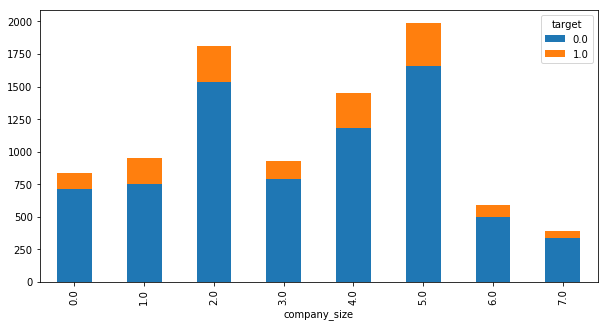

In [39]:
df1.groupby(["company_size", "target"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

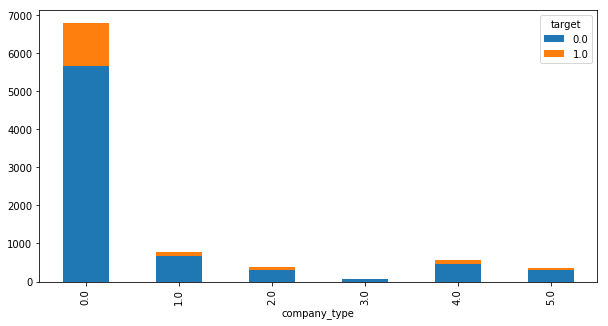

In [40]:
df1.groupby(["company_type", "target"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

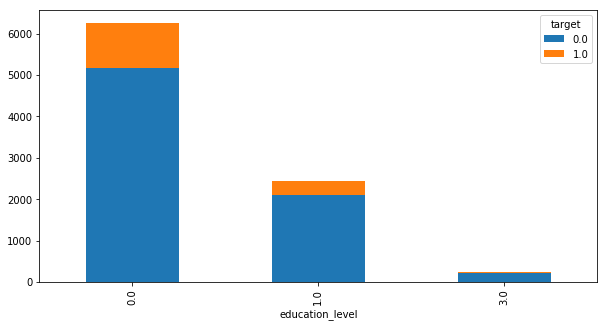

In [41]:
df1.groupby(["education_level", "target"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

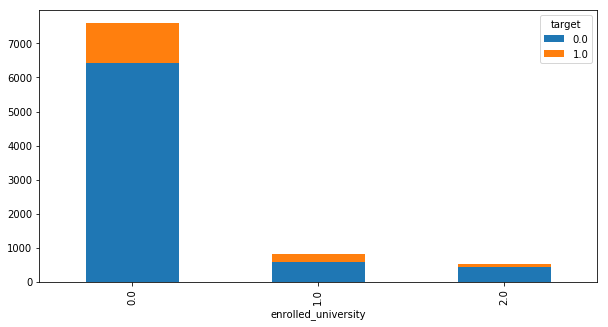

In [42]:
df1.groupby(["enrolled_university", "target"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

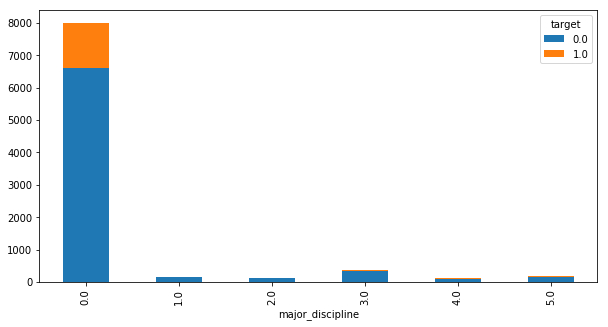

In [43]:
df1.groupby(["major_discipline", "target"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

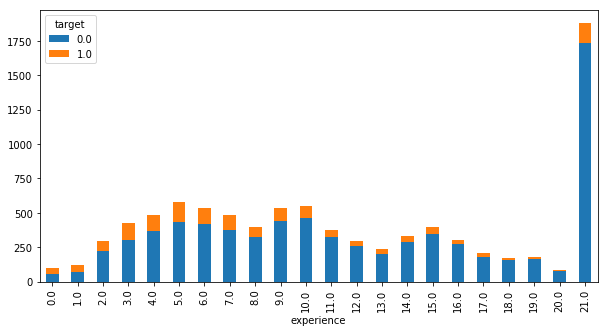

In [44]:
df1.groupby(["experience", "target"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

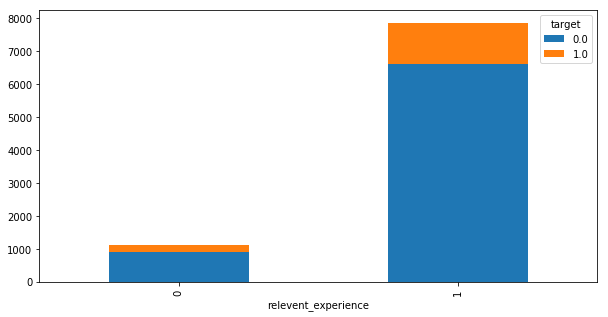

In [45]:
df1.groupby(["relevent_experience", "target"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

In [46]:
cross=pd.crosstab(df1['company_type'], df1['target'],normalize=True)

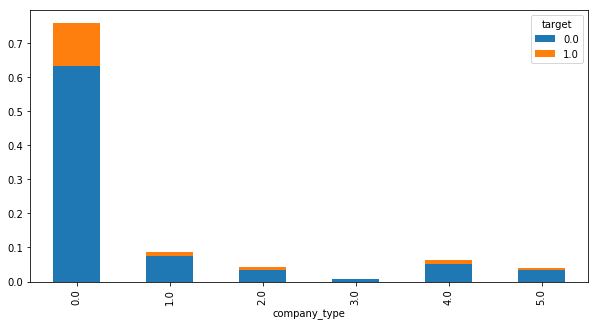

In [47]:
cross.plot(kind='bar', stacked=True, figsize=(10,5))

In [48]:
x = df1.drop(['target','enrollee_id'], axis=1, inplace=False) 


In [49]:
x_cv = test.drop(['enrollee_id'], axis=1, inplace=False) 


In [50]:
y=df1['target']

In [51]:
x.shape,y.shape, x_cv.shape

((8955, 12), (8955,), (1019, 12))

In [52]:
x=pd.get_dummies(x, drop_first=True)

In [53]:
x_cv=pd.get_dummies(x_cv, drop_first=True)

In [54]:
x.shape,y.shape, x_cv.shape

((8955, 12), (8955,), (1019, 12))

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import tree , metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=100)

In [57]:
#x['city'] = x['city'].astype('category')
#x['relevent_experience'] = x['relevent_experience'].astype('category')
#x['enrolled_university'] = x['enrolled_university'].astype('category')
#x['education_level'] = x['education_level'].astype('category')


In [58]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42,max_features=4)
# Train the model on training data
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [59]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [60]:
feature_importances

,importance
city_development_index,0.234860
training_hours,0.227436
experience,0.132587
city,0.098806
company_size,0.094391
last_new_job,0.065449
company_type,0.039103
education_level,0.030333
enrolled_university,0.023886
gender,0.019739


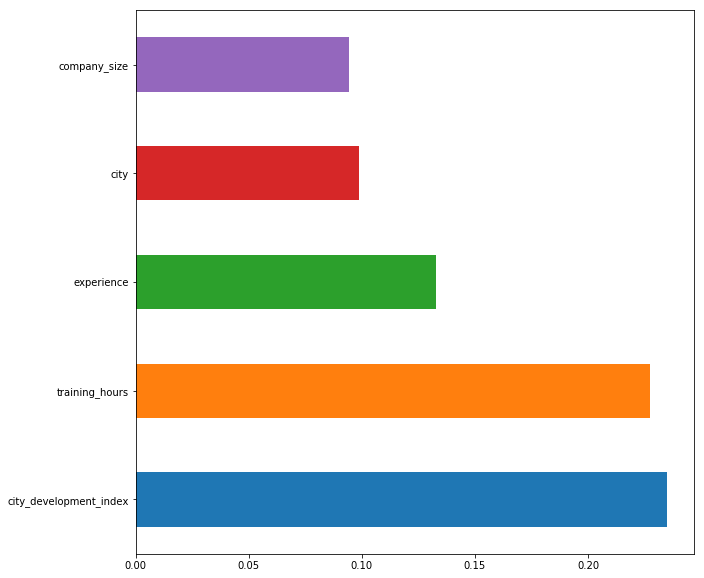

In [61]:
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances = feat_importances.nlargest(5)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

In [79]:
# number of trees
n_estimators=[int(x) for x in np.linspace(start=500, stop=1200, num=7)]
print(n_estimators)

[500, 616, 733, 850, 966, 1083, 1200]


In [80]:
# number of feature for every split
max_features=['auto', 'sqrt']
# maximum nuber of levels in tree
max_depth =[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
#minumum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
# minimum number of sample required at each leaf node
min_samples_leaf=[1,2,5,10]


In [82]:
# creating random grid
random_grid={'bootstrap': [True, False],
             'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'bootstrap': [True, False], 'n_estimators': [500, 616, 733, 850, 966, 1083, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
rf=RandomForestClassifier()
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10,  cv=5, verbose=2, random_state=42,n_jobs=1)

In [84]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   4.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   4.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   4.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   4.8s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   4.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=50

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=110, bootstrap=False, total=   2.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=110, bootstrap=False, total=   2.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=110, bootstrap=False, total=   2.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=110, bootstrap=False, total=   2.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'n_estimators': [500, 616, 733, 850, 966, 1083, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
     

In [85]:
y_pred_rf=rf_random.predict(x_test)

In [90]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [86]:
confusion_matrix(y_test, y_pred_rf)

array([[1382,  103],
       [ 157,  149]], dtype=int64)

In [91]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Job change", "No change"] , yticklabels = ["Job change", "No change"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # correct 0 is sensitivity and correct is specificity

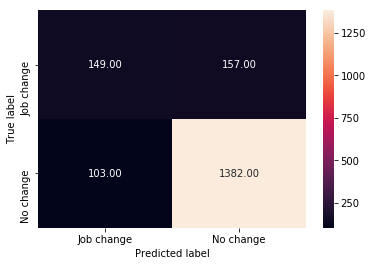

In [92]:
draw_cm( y_test, y_pred_rf)

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [94]:
y_pred_prob_rf=rf_random.predict_proba(x_test)[:,1]

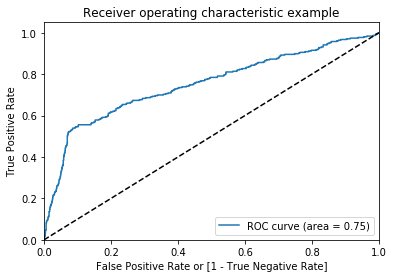

In [96]:
fpr, tpr, thresholds = draw_roc( y_test,y_pred_prob_rf)

In [101]:
predictions= rf_random.predict(x_cv)

In [102]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,27385,10,0.827,1.0,1,0.0,1.0,0.0,11.0,1.0,0.0,1.0,39
1,27724,0,0.920,1.0,1,0.0,0.0,0.0,21.0,4.0,0.0,5.0,72
2,9272,27,0.698,1.0,1,0.0,0.0,0.0,20.0,1.0,0.0,2.0,51
3,14249,7,0.762,1.0,1,0.0,0.0,0.0,8.0,2.0,3.0,0.0,48
4,7865,2,0.624,1.0,1,0.0,1.0,0.0,4.0,2.0,0.0,1.0,4


In [104]:
#Create a  DataFrame
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
                        

#Visualize the first 10 rows
submission.head(15)

,enrollee_id,target
0,27385,0.0
1,27724,0.0
2,9272,0.0
3,14249,0.0
4,7865,1.0
5,7463,0.0
6,25202,0.0
7,23570,0.0
8,9548,0.0
9,17189,1.0


In [106]:
submission.to_csv('submission.csv', index=False)

In [108]:
pd.read_csv('submission.csv').head()

,enrollee_id,target
0,27385,0.0
1,27724,0.0
2,9272,0.0
3,14249,0.0
4,7865,1.0
